In [74]:
import requests
import pandas as pd

In [41]:
def get_news_data():
    api_key = '2a4a42cc0ad9456abb65952a9a37ae8a'  # Your NewsAPI key
    base_url = 'https://newsapi.org/v2/everything'  # API endpoint for news
    params = {
        'q': 'S&P 500',  # Your search query
        'apiKey': api_key,
        'language': 'en',  # Only English articles
        'pageSize': 100,  # Number of articles per request
        'sortBy': 'publishedAt',  # Sort articles by published date
        'page': 1  # Pagination to fetch more articles in different batches
    }
    
    response = requests.get(base_url, params=params)
    
    # Check if the request was successful
    if response.status_code == 200:
        return response.json()  # Return the response as JSON
    else:
        print(f"Request failed with status code {response.status_code}")
        return None

# Initialize an empty list to store all articles
all_articles = []

# Loop to collect data in batches
for i in range(10):  # Collect 10 batches
    print(f"Collecting batch {i + 1}...")
    
    # Update the page number for pagination
    params['page'] = i + 1  # Increment page number to collect different batches of data
    
    news_data = get_news_data()
    if news_data and 'articles' in news_data:
        # Append the articles to the list
        all_articles.extend(news_data['articles'])
    
    time.sleep(6)  # Sleep for 6 seconds between each request to prevent hitting rate limits

# Check how many articles have been collected
print(f"Total articles collected: {len(all_articles)}")

# Convert the list of articles to a DataFrame
df_news = pd.DataFrame(all_articles)

# Save the DataFrame to a CSV file
df_news.to_csv('news_articles_s&p500.csv', index=False)

# Display the first few rows of the DataFrame
print(df_news.head())

Total articles collected: 960
                                              source        author  \
0               {'id': None, 'name': 'Quartz India'}  Quartz Staff   
1  {'id': 'the-times-of-india', 'name': 'The Time...       Reuters   
2  {'id': 'al-jazeera-english', 'name': 'Al Jazee...    Al Jazeera   
3               {'id': None, 'name': 'Slashdot.org'}    feedfeeder   
4                       {'id': None, 'name': 'CNBC'}          None   

                                               title  \
0  Trump says he has 'no intention' of firing Fed...   
1  Wall Street ends higher on earnings, hopes of ...   
2  Trump backs off threat to fire Fed Chair Powel...   
3  Trump says he has no plans to fire Fed's Powel...   
4  CNBC Daily Open: Trump and Musk reassure inves...   

                                         description  \
0  President Donald Trump appeared late Tuesday t...   
1  U.S. stocks surged on Tuesday, fueled by encou...   
2  Wall Street rallies after US Treasury Sec

In [42]:
df_news = pd.read_csv('news_articles_s&p500.csv')
df_news.head()

,source,author,title,description,url,urlToImage,publishedAt,content
0,"{'id': None, 'name': 'Quartz India'}",Quartz Staff,Trump says he has 'no intention' of firing Fed...,President Donald Trump appeared late Tuesday t...,https://qz.com/trump-fed-chair-jerome-powell-f...,"https://i.kinja-img.com/image/upload/c_fill,h_...",2025-04-23T02:35:14Z,President Donald Trump appeared late Tuesday t...
1,"{'id': 'the-times-of-india', 'name': 'The Time...",Reuters,"Wall Street ends higher on earnings, hopes of ...","U.S. stocks surged on Tuesday, fueled by encou...",https://economictimes.indiatimes.com/markets/s...,"https://img.etimg.com/thumb/msid-120535017,wid...",2025-04-23T01:52:41Z,U.S. stocks rebounded on Tuesday as a spate of...
2,"{'id': 'al-jazeera-english', 'name': 'Al Jazee...",Al Jazeera,Trump backs off threat to fire Fed Chair Powel...,Wall Street rallies after US Treasury Secretar...,https://www.aljazeera.com/economy/2025/4/23/tr...,https://www.aljazeera.com/wp-content/uploads/2...,2025-04-23T01:50:31Z,United States President Donald Trump has backe...
3,"{'id': None, 'name': 'Slashdot.org'}",feedfeeder,Trump says he has no plans to fire Fed's Powel...,Trump says he has no plans to fire Fed's Powel...,https://slashdot.org/firehose.pl?op=view&amp;i...,NaN,2025-04-23T01:32:47Z,If all the world's economists were laid end to...
4,"{'id': None, 'name': 'CNBC'}",NaN,CNBC Daily Open: Trump and Musk reassure inves...,"Markets are open-minded, and often react almos...",https://www.cnbc.com/2025/04/23/cnbc-daily-ope...,https://image.cnbcfm.com/api/v1/image/10813141...,2025-04-23T01:08:55Z,President Donald Trump and Elon Musk attend UF...


In [44]:
df_news.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 960 entries, 0 to 959
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   source       960 non-null    object
 1   author       910 non-null    object
 2   title        960 non-null    object
 3   description  740 non-null    object
 4   url          960 non-null    object
 5   urlToImage   910 non-null    object
 6   publishedAt  960 non-null    object
 7   content      960 non-null    object
dtypes: object(8)
memory usage: 60.1+ KB


In [45]:
df_news.isnull().sum()

source           0
author          50
title            0
description    220
url              0
urlToImage      50
publishedAt      0
content          0
dtype: int64

In [46]:
df_news.describe()

,source,author,title,description,url,urlToImage,publishedAt,content
count,960,910,960,740,960,910,960,960
unique,42,61,93,72,96,83,92,91
top,"{'id': None, 'name': 'Biztoc.com'}",bloomberg.com,Trump says he has 'no intention' of firing Fed...,The president previously said he could fire Je...,https://qz.com/trump-fed-chair-jerome-powell-f...,https://biztoc.com/cdn/930/og.png,2025-04-22T23:46:29Z,The Fine Print: The following comments are own...
freq,330,80,20,20,10,90,20,30


In [47]:
df_news['author'].fillna('Unknown', inplace=True)
df_news['description'].fillna('No description available', inplace=True)
df_news['urlToImage'].fillna('No image available', inplace=True)
df_news.isnull().sum()

source         0
author         0
title          0
description    0
url            0
urlToImage     0
publishedAt    0
content        0
dtype: int64

In [48]:
df_news['publishedAt'] = pd.to_datetime(df_news['publishedAt'])
df_news['publishedAt'].head()

0   2025-04-23 02:35:14+00:00
1   2025-04-23 01:52:41+00:00
2   2025-04-23 01:50:31+00:00
3   2025-04-23 01:32:47+00:00
4   2025-04-23 01:08:55+00:00
Name: publishedAt, dtype: datetime64[ns, UTC]

In [49]:
!pip install vaderSentiment==3.3.2

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 126.0/126.0 kB 16.3 MB/s eta 0:00:00

[notice] A new release of pip is available: 23.0.1 -> 25.0.1
[notice] To update, run: pip install --upgrade pip


In [50]:
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer

# Initialize the SentimentIntensityAnalyzer
analyzer = SentimentIntensityAnalyzer()

# Function to get sentiment score
def get_sentiment(text):
    sentiment = analyzer.polarity_scores(text)
    return sentiment['compound']  # Returns the compound score for overall sentiment

# Apply the sentiment function to the content column
df_news['sentiment'] = df_news['content'].apply(get_sentiment)

# Check sentiment scores
print(df_news[['title', 'sentiment']].head())


                                               title  sentiment
0  Trump says he has 'no intention' of firing Fed...    -0.6249
1  Wall Street ends higher on earnings, hopes of ...    -0.4019
2  Trump backs off threat to fire Fed Chair Powel...    -0.4404
3  Trump says he has no plans to fire Fed's Powel...    -0.0191
4  CNBC Daily Open: Trump and Musk reassure inves...     0.0000


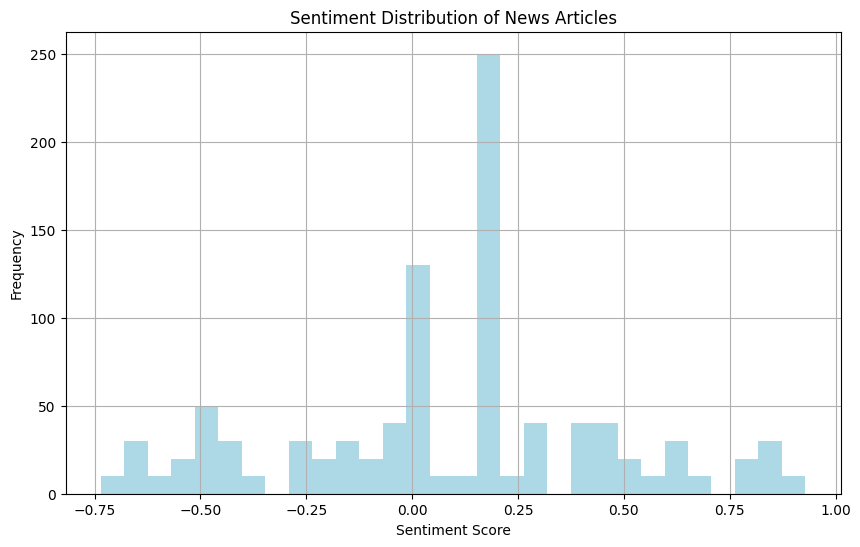

In [51]:
import matplotlib.pyplot as plt

# Plot sentiment distribution
plt.figure(figsize=(10,6))
df_news['sentiment'].hist(bins=30, color='lightblue')
plt.title('Sentiment Distribution of News Articles')
plt.xlabel('Sentiment Score')
plt.ylabel('Frequency')
plt.show()


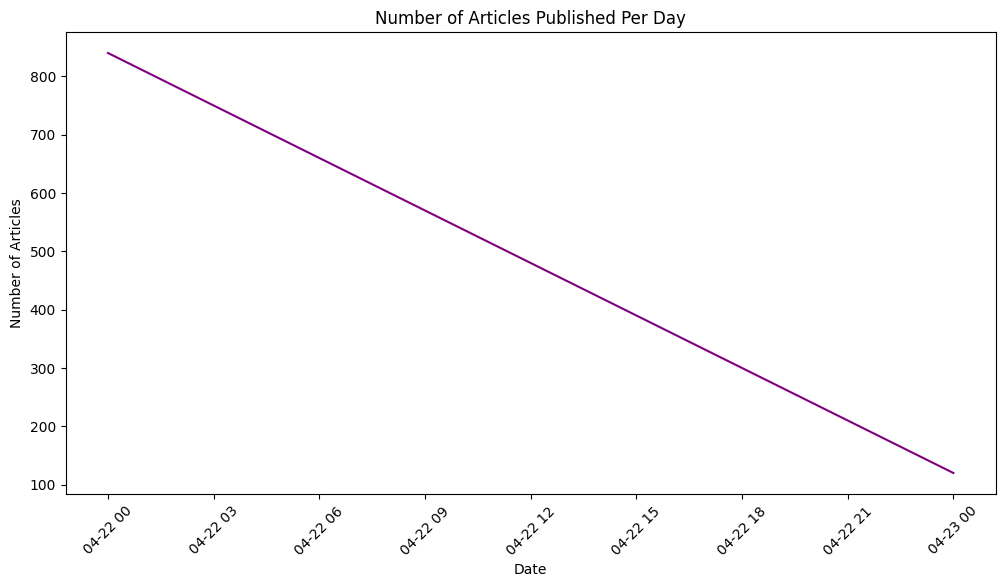

In [52]:
#articles over time
# Group by date and count the number of articles published per day
articles_by_date = df_news.groupby(df_news['publishedAt'].dt.date).size()

# Plot the number of articles published per day
plt.figure(figsize=(12,6))
articles_by_date.plot(kind='line', color='purple')
plt.title('Number of Articles Published Per Day')
plt.xlabel('Date')
plt.ylabel('Number of Articles')
plt.xticks(rotation=45)
plt.show()


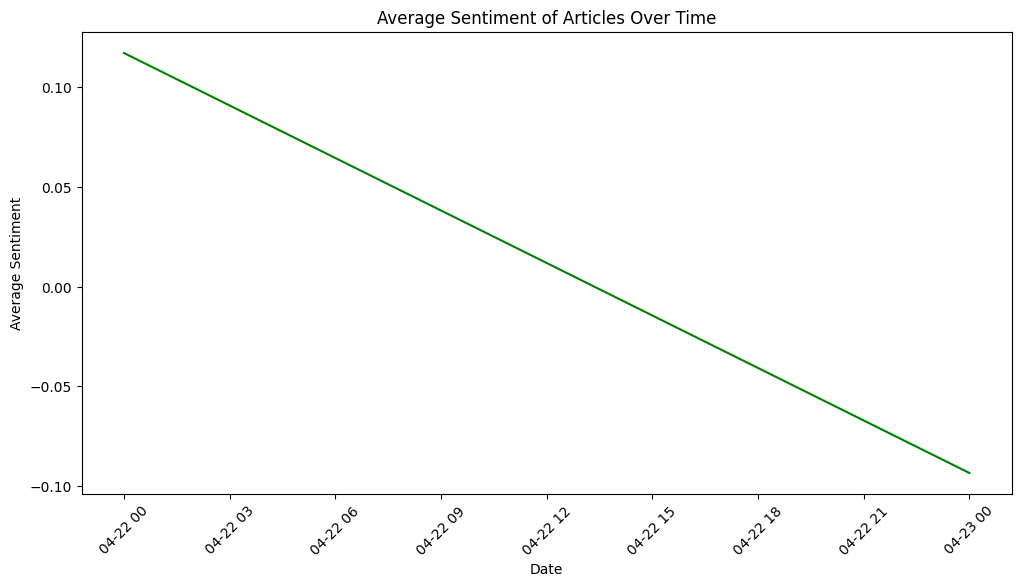

In [53]:
# Group sentiment by day
sentiment_by_date = df_news.groupby(df_news['publishedAt'].dt.date)['sentiment'].mean()

# Plot sentiment over time
plt.figure(figsize=(12,6))
sentiment_by_date.plot(kind='line', color='green')
plt.title('Average Sentiment of Articles Over Time')
plt.xlabel('Date')
plt.ylabel('Average Sentiment')
plt.xticks(rotation=45)
plt.show()
